<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [1]:
import joblib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import folium
from folium.plugins import HeatMap
import webbrowser
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
import scienceplots
plt.style.use(['science','nature'])
plt.rcParams["text.usetex"] = False   # <-- FIX

import warnings
warnings.filterwarnings('ignore')

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>

In [2]:
df = pd.read_csv('Soil Quality.csv')

In [3]:
# Show First 10 Rows of Data
df.head(10)

,FID,Shape,FID_1,Area,Block,Profile,EC,SAR,E_Depth,WT,...,P,K,Fe,Mn,Zn,Cu,TEXTURE_AL,pH,Long,Lat
0,267,Point,789,1,66,529,1.19,2.50,150,150,...,30.40,580.0,5.6500,7.0250,1.08,2.70,Clay,6.76,"30° 28' 13.324"" E","30° 59' 7.625"" N"
1,835,Point,2299,1,69,115,0.61,1.92,150,120,...,14.00,480.0,5.7750,3.4500,0.81,4.80,Clay,8.01,"30° 24' 2.133"" E","31° 15' 36.838"" N"
2,394,Point,940,1,54,167,1.55,2.50,120,150,...,13.40,310.0,6.8750,4.4500,0.70,3.80,Clay,8.16,"30° 16' 35.877"" E","30° 59' 36.707"" N"
3,346,Point,874,1,44,80,1.00,3.20,120,150,...,31.00,205.0,8.8750,4.2750,0.75,2.80,Clay,8.31,"30° 8' 22.274"" E","31° 6' 19.537"" N"
4,569,Point,1372,1,67,249,0.85,2.40,150,100,...,19.00,390.0,9.0875,7.0875,1.20,2.75,Clay,8.28,"30° 25' 2.116"" E","31° 6' 41.376"" N"
5,58,Point,402,1,54,80,2.90,1.10,150,150,...,10.40,410.0,5.3625,3.7500,0.80,4.20,Clay,7.59,"30° 15' 39.719"" E","30° 58' 47.685"" N"
6,749,Point,2207,1,115,93,1.00,2.20,120,150,...,13.80,490.0,3.4500,4.0750,1.00,4.00,Clay,8.07,"30° 38' 37.348"" E","30° 49' 25.294"" N"
7,760,Point,2218,1,115,158,1.30,3.40,120,150,...,22.35,510.0,8.7500,7.5000,1.20,5.20,Clay,7.45,"30° 39' 34.187"" E","30° 47' 31.797"" N"
8,844,Point,2308,1,87,113,2.48,5.19,150,150,...,28.00,325.0,3.0000,7.2500,0.95,3.10,Clay,7.60,"30° 31' 23.700"" E","30° 52' 38.722"" N"
9,994,Point,2474,1,68,525,1.10,1.84,150,150,...,10.00,490.0,10.3000,4.7750,0.98,3.10,Clay,7.79,"30° 28' 27.695"" E","31° 12' 39.423"" N"


In [4]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 2279
Number of Columns : 24


In [5]:
# Show Info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         2279 non-null   int64  
 1   Shape       2279 non-null   object 
 2   FID_1       2279 non-null   int64  
 3   Area        2279 non-null   int64  
 4   Block       2279 non-null   int64  
 5   Profile     2279 non-null   int64  
 6   EC          2279 non-null   float64
 7   SAR         2279 non-null   float64
 8   E_Depth     2279 non-null   int64  
 9   WT          2279 non-null   int64  
 10  CaCO3       2279 non-null   float64
 11  Gypsum      2279 non-null   float64
 12  OM          2279 non-null   float64
 13  N           2279 non-null   float64
 14  P           2279 non-null   float64
 15  K           2279 non-null   float64
 16  Fe          2279 non-null   float64
 17  Mn          2279 non-null   float64
 18  Zn          2279 non-null   float64
 19  Cu          2279 non-null  

In [7]:
# Check NaN Value
df.isna().sum()

FID           0
Shape         0
FID_1         0
Area          0
Block         0
Profile       0
EC            0
SAR           0
E_Depth       0
WT            0
CaCO3         0
Gypsum        0
OM            0
N             0
P             0
K             0
Fe            0
Mn            0
Zn            0
Cu            0
TEXTURE_AL    0
pH            0
Long          0
Lat           0
dtype: int64

In [8]:
# Describe Numiric Data
df.describe()

,FID,FID_1,Area,Block,Profile,EC,SAR,E_Depth,WT,CaCO3,Gypsum,OM,N,P,K,Fe,Mn,Zn,Cu,pH
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,2010.636683,1781.261518,1.849057,58.782799,297.819658,4.075186,5.494816,136.735849,157.229048,8.618021,1.187072,1.137919,120.296253,14.834066,299.326025,5.962179,4.548926,1.329723,2.798965,8.107569
std,1011.907749,1059.203731,1.351693,31.702341,191.557267,7.426831,6.978046,24.786312,31.906225,40.536538,1.527195,3.070659,48.687245,9.474542,208.312992,2.307867,2.774847,0.931441,2.075619,0.693822
min,11.000000,11.000000,1.000000,16.000000,1.000000,0.180000,0.400000,10.000000,0.000000,0.020000,0.010000,0.010000,10.000000,1.259280,10.500000,0.120000,0.029000,0.100000,0.010000,6.500000
25%,1261.500000,886.500000,1.000000,33.000000,129.500000,1.300000,2.400000,120.000000,150.000000,3.500000,0.500000,0.230000,86.000000,5.550000,94.720000,4.100000,2.750000,0.800000,0.440000,7.640000
50%,1902.000000,1727.000000,1.000000,53.000000,281.000000,2.110000,3.800000,150.000000,150.000000,6.400000,0.900000,0.600000,110.400000,14.000000,325.000000,6.380000,4.250000,1.100000,2.800000,8.170000
75%,2989.500000,2756.000000,4.000000,81.000000,460.000000,3.715000,6.130000,150.000000,200.000000,10.300000,1.350000,1.480000,157.500000,20.465000,465.000000,7.180000,5.832000,1.600000,4.600000,8.670000
max,3559.000000,3559.000000,4.000000,149.000000,671.000000,126.600000,104.630000,150.000000,200.000000,1908.000000,30.000000,65.000000,399.000000,47.170000,1403.400000,17.625000,21.640000,10.600000,9.800000,9.200000


In [9]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isna().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
FID,2279,0,0.0,2279
Shape,2279,0,0.0,1
FID_1,2279,0,0.0,2279
Area,2279,0,0.0,2
Block,2279,0,0.0,69
Profile,2279,0,0.0,648
EC,2279,0,0.0,664
SAR,2279,0,0.0,791
E_Depth,2279,0,0.0,30
WT,2279,0,0.0,26


In [10]:
# Check Dublication
df.duplicated().sum()

0

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Detection Outliers</h2>
</div>

In [10]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1  
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR


        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns =df.select_dtypes('number').columns.to_list()
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

FID: 0 outliers detected
FID_1: 0 outliers detected
Area: 0 outliers detected
Block: 0 outliers detected
Profile: 0 outliers detected
EC: 245 outliers detected
SAR: 172 outliers detected
E_Depth: 88 outliers detected
WT: 28 outliers detected
CaCO3: 89 outliers detected
Gypsum: 193 outliers detected
OM: 24 outliers detected
N: 22 outliers detected
P: 5 outliers detected
K: 1 outliers detected
Fe: 22 outliers detected
Mn: 74 outliers detected
Zn: 140 outliers detected
Cu: 0 outliers detected
pH: 0 outliers detected


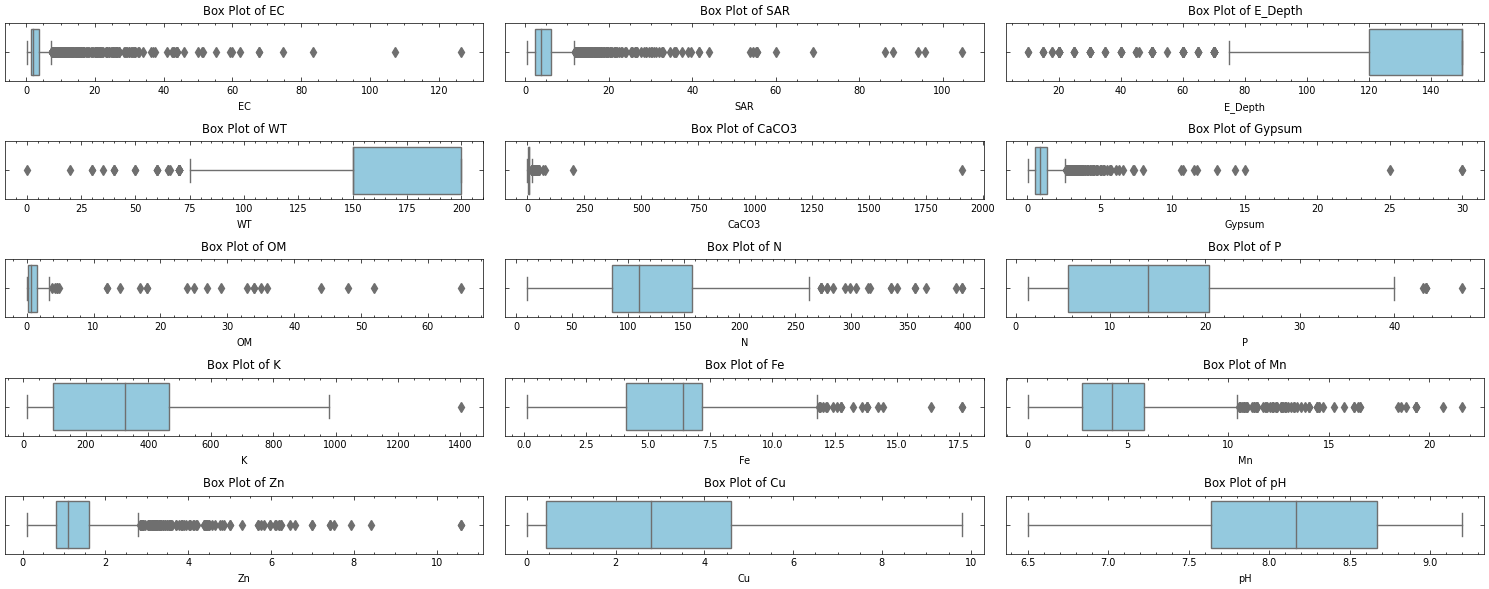

In [11]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns[5:], 1):
    plt.subplot(5, 3, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

- Although a number of outliers were detected in several soil variables (e.g., EC, SAR, Gypsum, CaCO₃, micronutrients), these values were not removed from the dataset. All measurements originate from real field and laboratory experiments conducted on soil samples collected from El-Beheira Governorate, Egypt.

- The detected outliers therefore represent actual spatial and chemical variability of the soils, particularly in salinity, sodicity, and mineral content, which are known to vary widely in reclaimed and irrigated areas of the Nile Delta. Removing these values would distort the true soil conditions and reduce the representativeness of the dataset. Consequently, all data points were retained for subsequent analysis.

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Data and Get Insights</h2>
</div>

## Distribution Plots for Numerical Columns 

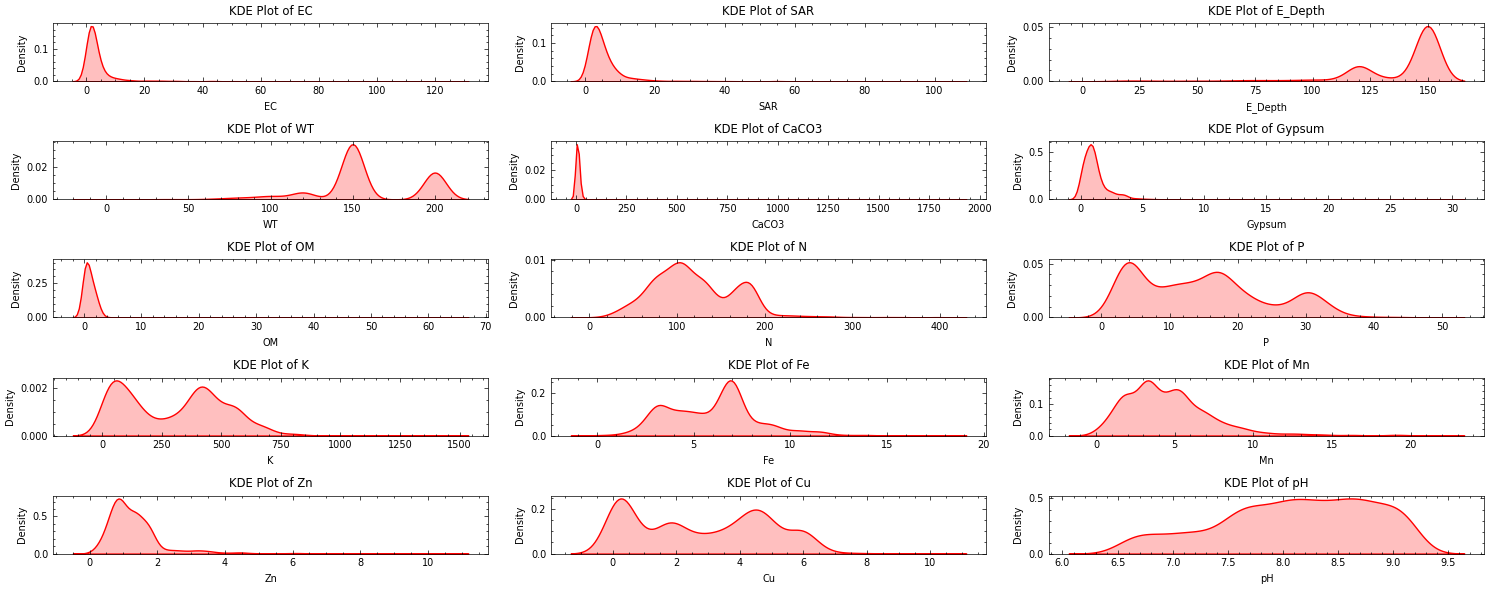

In [12]:
plt.figure(figsize=(15, 6))

for idx, col_idx in enumerate(range(5, len(numerical_columns)), 1):
    plt.subplot(5, 3, idx)
    sns.kdeplot(data=df, x=numerical_columns[col_idx], fill=True, color="red")
    plt.title(f"KDE Plot of {numerical_columns[col_idx]}")

plt.tight_layout()
plt.show()

In [13]:
px.bar(df['TEXTURE_AL'].value_counts(),
        title='Soil Type Distribution',
        template='plotly_dark',
        text_auto=True,
        color_discrete_sequence=px.colors.sequential.Blues_r,
        labels={'TEXTURE_AL':'Soil Type', 'value':'Count'}
       )

In [ ]:
.

## El-Beheira Governorate, Egypt

In [ ]:
def dms_to_decimal(dms_str):
    match = re.match(r"(\d+)°\s*(\d+)'?\s*([\d.]+)?\"?\s*([NSEW])", str(dms_str).strip())
    if not match:
        return None
    deg, minutes, seconds, direction = match.groups()
    deg = float(deg)
    minutes = float(minutes)
    seconds = float(seconds) if seconds else 0.0

    decimal = deg + minutes / 60 + seconds / 3600
    if direction in ['S', 'W']:
        decimal *= -1
    return decimal

df['Lat'] = df['Lat'].apply(dms_to_decimal)
df['Long'] = df['Long'].apply(dms_to_decimal)
df = df.dropna(subset=['Lat', 'Long'])

m = folium.Map(
    location=[df['Lat'].mean(), df['Long'].mean()],
    zoom_start=6,
    tiles='Esri.WorldImagery'
)

heat_data = [[row['Lat'], row['Long'], row['EC']] for _, row in df.iterrows()]

HeatMap(
    heat_data,
    radius=20,
    blur=15,
    max_zoom=10
).add_to(m)

webbrowser.open("heatmap.html")
m


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Data Preprocessing</h2>
</div>

#### Drop Unnecessary Columns

In [11]:
df.drop(columns=['FID', 'Shape', 'FID_1','Area','Block','Profile','Long','Lat'], inplace=True)

#### Label Encoding for Categorical Columns 

In [12]:
le = LabelEncoder()
df['TEXTURE_AL'] = le.fit_transform(df['TEXTURE_AL'])
le.classes_

array(['Clay', 'Clay Loam', 'Loam', 'Loamy Sand', 'Sand', 'Sandy Clay',
       'Sandy Clay Loam', 'Sandy Loam', 'Silty Clay', 'Silty Clay Loam',
       'Silty Loam'], dtype=object)

#### Feature Engineering to create new features 

In [13]:
# 1. Soil Organic Carbon (SOC)
df['SOC'] = (df['OM'] / 1.724).round(2)

#2. Carbon-to-Nitrogen Ratio (C:N)
df['N_percentage'] = df['N'] / 10000
df['C_N_Ratio'] = (df['SOC'] / df['N_percentage']).round(2)

# 3. Exchangeable Sodium Percentage (ESP)
df['ESP'] = ((100 * df['SAR']) / (df['SAR'] + 1)).round(2)

# Drop Unnecessary Columns
df.drop(columns=['N_percentage'],inplace=True)

- 1- Soil Organic Carbon (SOC) -> Nelson, D. W., & Sommers, L. E. (1996). Total carbon, organic carbon, and organic matter. In D. L. Sparks (Ed.), Methods of Soil Analysis Part 3: Chemical Methods (pp. 961–1010). Soil Science Society of America, American Society of Agronomy.

- 2- Carbon-to-Nitrogen Ratio (C:N) -> Brady, N. C., & Weil, R. R. (2016). The Nature and Properties of Soils (15th ed.). Pearson.

- 3- Exchangeable Sodium Percentage (ESP) -> Richards, L. A. (Ed.). (1954). Diagnosis and Improvement of Saline and Alkali Soils (Agriculture Handbook No. 60). U.S. Department of Agriculture.

In [14]:
# Show Sample of Data 
df.sample(10)

,EC,SAR,E_Depth,WT,CaCO3,Gypsum,OM,N,P,K,Fe,Mn,Zn,Cu,TEXTURE_AL,pH,SOC,C_N_Ratio,ESP
1388,3.43,11.0000,150,150,2.60,0.50,0.40,73.08,3.24,27.54,3.1200,0.990,1.34,0.12,4,8.44,0.23,31.47,91.67
576,0.90,1.6000,120,150,6.00,1.07,2.00,100.80,26.40,380.00,6.5750,8.075,0.68,2.40,1,7.65,1.16,115.08,61.54
580,5.77,7.0000,120,150,2.30,1.50,1.80,86.00,15.30,220.00,6.3375,2.975,0.60,4.30,1,8.47,1.04,120.93,87.50
2000,0.58,0.7888,150,150,6.70,0.80,0.27,108.00,17.00,425.00,6.6000,5.200,0.86,4.60,7,8.27,0.16,14.81,44.10
753,2.38,4.4000,50,150,10.60,0.70,0.20,73.08,3.24,27.54,3.1200,0.990,1.34,0.12,3,8.48,0.12,16.42,81.48
553,2.37,2.2000,120,150,8.80,2.50,1.50,128.00,32.00,680.00,10.5000,5.500,0.60,4.30,1,7.04,0.87,67.97,68.75
1313,6.33,7.5100,150,150,26.00,0.96,0.33,80.00,22.00,365.00,3.0750,3.975,0.87,3.70,4,7.58,0.19,23.75,88.25
1537,1.43,4.7800,120,200,4.78,0.25,0.39,98.88,4.80,146.88,2.5300,1.090,1.38,0.23,4,8.59,0.23,23.26,82.70
258,1.52,2.5000,150,150,4.80,0.97,1.48,84.00,8.00,410.00,13.8250,5.275,1.00,5.30,0,7.77,0.86,102.38,71.43
376,6.24,6.3000,150,150,4.00,1.50,1.20,84.00,22.00,300.00,7.7500,5.750,0.80,3.60,0,7.50,0.70,83.33,86.30


In [15]:
fig = px.imshow(
    df.corr(),
    text_auto=".2f",  # <-- 2 decimal places
    color_continuous_scale="tempo",
    template='plotly_dark',
    title="Correlation Heatmap"
)

fig.update_layout(
    width=1000,
    height=800
)
fig.show()

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Clustering</h2>
</div>

In [16]:
clustering_features =['EC', 'SAR', 'CaCO3', 'Gypsum', 'OM','N', 'P', 'K', 'Fe', 'Mn', 'Zn', 'Cu','TEXTURE_AL','E_Depth','pH']

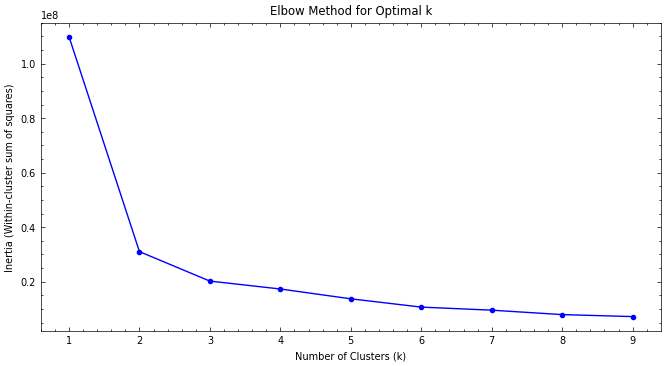

In [17]:
inertia = []  
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df[clustering_features])
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [18]:
# Initialize KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[clustering_features])

In [19]:
# Evaluates Cluster Quality
score = silhouette_score(df[clustering_features], df['Cluster'])
print("Silhouette Score:", round(score, 3))

Silhouette Score: 0.552


In [20]:
pd.DataFrame(kmeans.cluster_centers_,columns=clustering_features)

,EC,SAR,CaCO3,Gypsum,OM,N,P,K,Fe,Mn,Zn,Cu,TEXTURE_AL,E_Depth,pH
0,5.480142,6.672415,8.719838,1.245653,0.579892,128.639535,7.946666,88.061041,5.510050,3.579849,1.696423,1.186912,4.305359,136.334681,8.749828
1,2.805843,4.481236,7.681386,1.193637,1.280537,103.498464,17.140122,396.201894,5.773789,5.488454,0.998605,3.686393,2.631640,138.093533,7.908707
2,3.390637,4.818203,10.293561,1.037017,2.148255,135.143844,26.189242,594.247170,7.401568,4.890401,1.150675,4.746627,3.950472,134.898585,7.015637


In [21]:
# Correlation Heatmap After Clustring
fig = px.imshow(df.corr(), 
                text_auto=".2f",
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

#### Rename Each Cluster With Scientific Name

In [22]:
# Define mapping dictionary
cluster_names = {
    2: "High Agricultural Performance Cluster",
    1: "Balanced Agricultural Productivity Cluster",
    0: "Low Agricultural Viability Cluster"
}

# Replace numeric labels with names
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

# Show sample
df[['Cluster', 'Cluster_Name']].head()

,Cluster,Cluster_Name
0,2,High Agricultural Performance Cluster
1,1,Balanced Agricultural Productivity Cluster
2,1,Balanced Agricultural Productivity Cluster
3,0,Low Agricultural Viability Cluster
4,1,Balanced Agricultural Productivity Cluster


Cluster (Row)	Key Characteristics	Assigned Name

Row 1	High Salinity (EC) & Sodicity (SAR). Lowest OM, P, K, & micronutrients.	Low Agricultural Viability Cluster

Row 2	Lowest EC & SAR (Very Good). Mixed nutrient profile (low N, high K).	Balanced Agricultural Productivity Cluster

Row 3	Highest OM, N, P, K, & most micronutrients. Good EC & SAR.	High Agricultural Performance Cluster


Cluster-by-Cluster Analysis
By applying this logic, we can clearly see the profile for each cluster center.

1. High Agricultural Performance Cluster (Row 3)

This row is indisputably the best. It has the highest values for almost every key nutrient and positive indicator:

Highest Organic Matter (OM): 2.14

Highest Nitrogen (N): 135.1

Highest Phosphorus (P): 26.1

Highest Potassium (K): 594.2

Highest Iron (Fe), Zinc (Zn), and Copper (Cu)

It also has good (low) EC and SAR values, indicating no salinity or sodicity problems.

-----------------------------

2. Balanced Agricultural Productivity Cluster (Row 2)

This row represents a solid, moderate soil. It's not the best, but it's certainly not the worst.

It has the best (lowest) EC and SAR values, meaning it has excellent soil structure with no salt issues.

Its nutrient profile is mixed: It has the highest Manganese (Mn) and good Potassium (K).

However, it also has the lowest Nitrogen (N) and Zinc (Zn), and its Organic Matter (1.28) is in the middle.

3. Low Agricultural Viability Cluster (Row 1)
This row is clearly the most problematic and challenging for agriculture.

It has the highest (worst) EC (5.48) and SAR (6.67), indicating significant salinity and sodicity problems, which make it hard for plants to grow.

It has the lowest (worst) Organic Matter (OM): 0.57

It also has the lowest levels of crucial nutrients: Phosphorus (P), Potassium (K), Iron (Fe), Manganese (Mn), and Copper (Cu).

#### Assign feature and target variables

In [23]:
X = df.drop(columns=['Cluster','Cluster_Name'])
y = df['Cluster']

#### Splitting Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 , shuffle=True)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Modeling</h2>
</div>

#### Use Different Models Algorithm

In [25]:
def train(model ,model_name ,X_train ,y_train ,X_test ,y_test):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score}%\n{model_name} model score on Testing data: {model_test_score}%")

def class_report(model ,X_test , y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['Low Agricultural Viability Cluster','Balanced Agricultural Productivity Cluster','High Agricultural Performance Cluster']))

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Low Agricultural Viability Cluster','Balanced Agricultural Productivity Cluster','High Agricultural Performance Cluster'], cmap=plt.cm.Blues, normalize=None,xticks_rotation=45)
    disp.ax_.set_title(f'Confusion Matrix for {model_name}')
    plt.show()

#### Logistic Regression

Logistic Regression model score on Training data: 0.9654415798134942%
Logistic Regression model score on Testing data: 0.9627192982456141%
                                            precision    recall  f1-score   support

        Low Agricultural Viability Cluster       0.99      1.00      0.99       187
Balanced Agricultural Productivity Cluster       0.97      0.94      0.96       197
     High Agricultural Performance Cluster       0.87      0.93      0.90        72

                                  accuracy                           0.96       456
                                 macro avg       0.94      0.96      0.95       456
                              weighted avg       0.96      0.96      0.96       456



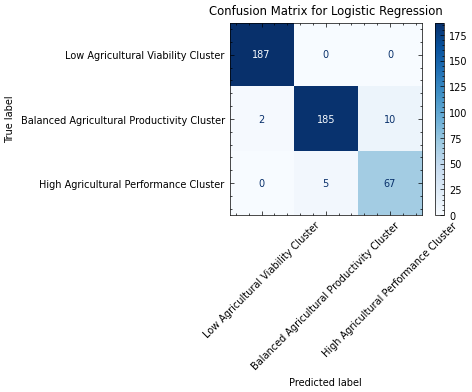

In [26]:
lr = LogisticRegression()
train(lr , "Logistic Regression" ,X_train ,y_train ,X_test ,y_test)
class_report(lr ,X_test , y_test)
plot_confusion_matrix(lr, X_test, y_test, "Logistic Regression")

#### SVM (Support Vector Machine)

SVM Classifier model score on Training data: 0.9808008776741635%
SVM Classifier model score on Testing data: 0.9802631578947368%
                                            precision    recall  f1-score   support

        Low Agricultural Viability Cluster       0.98      0.99      0.99       187
Balanced Agricultural Productivity Cluster       0.97      0.98      0.98       197
     High Agricultural Performance Cluster       0.99      0.93      0.96        72

                                  accuracy                           0.98       456
                                 macro avg       0.98      0.97      0.98       456
                              weighted avg       0.98      0.98      0.98       456



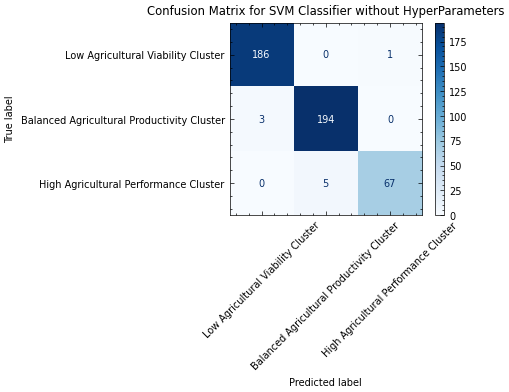

In [27]:
svc = SVC()
train(svc , "SVM Classifier" ,X_train ,y_train ,X_test ,y_test)
class_report(svc ,X_test , y_test)
plot_confusion_matrix(svc, X_test, y_test, "SVM Classifier without HyperParameters")

SVM Classifier model score on Training data: 0.9917718047174986%
SVM Classifier model score on Testing data: 0.9868421052631579%
                                            precision    recall  f1-score   support

        Low Agricultural Viability Cluster       0.99      0.99      0.99       187
Balanced Agricultural Productivity Cluster       0.98      0.99      0.99       197
     High Agricultural Performance Cluster       0.99      0.94      0.96        72

                                  accuracy                           0.99       456
                                 macro avg       0.99      0.98      0.98       456
                              weighted avg       0.99      0.99      0.99       456



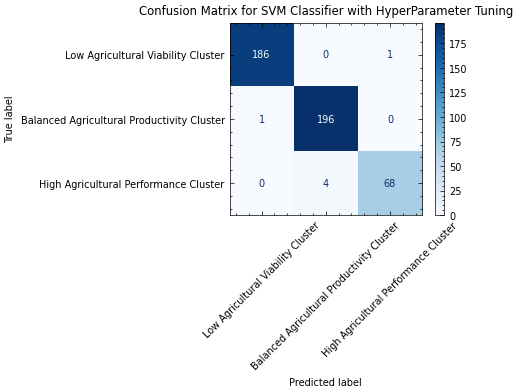

In [28]:
svc_HyperParameter = SVC(C=5, kernel='rbf', gamma='scale')
train(svc_HyperParameter , "SVM Classifier" ,X_train ,y_train ,X_test ,y_test)
class_report(svc_HyperParameter ,X_test , y_test)
plot_confusion_matrix(svc_HyperParameter, X_test, y_test, "SVM Classifier with HyperParameter Tuning")

#### KNN (K-Nearest Neighbors)

KNeighborsClassifier model score on Training data: 0.9890290729566649%
KNeighborsClassifier model score on Testing data: 0.9868421052631579%
                                            precision    recall  f1-score   support

        Low Agricultural Viability Cluster       0.98      0.99      0.99       187
Balanced Agricultural Productivity Cluster       0.98      0.98      0.98       197
     High Agricultural Performance Cluster       1.00      0.97      0.99        72

                                  accuracy                           0.99       456
                                 macro avg       0.99      0.98      0.99       456
                              weighted avg       0.99      0.99      0.99       456



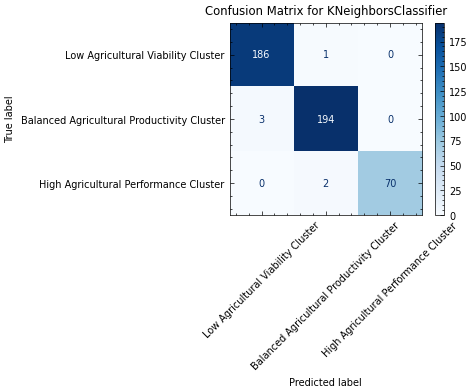

In [29]:
knn = KNeighborsClassifier()
train(knn , "KNeighborsClassifier" ,X_train ,y_train ,X_test ,y_test)
class_report(knn ,X_test , y_test)
plot_confusion_matrix(knn, X_test, y_test, "KNeighborsClassifier")

#### Decision Tree

DecisionTreeClassifier model score on Training data: 1.0%
DecisionTreeClassifier model score on Testing data: 0.9978070175438597%
                                            precision    recall  f1-score   support

        Low Agricultural Viability Cluster       1.00      1.00      1.00       187
Balanced Agricultural Productivity Cluster       0.99      1.00      1.00       197
     High Agricultural Performance Cluster       1.00      0.99      0.99        72

                                  accuracy                           1.00       456
                                 macro avg       1.00      1.00      1.00       456
                              weighted avg       1.00      1.00      1.00       456



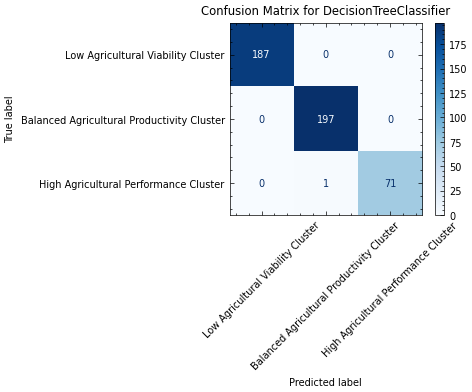

In [30]:
dt = DecisionTreeClassifier() ## May be removed
train(dt , "DecisionTreeClassifier" ,X_train ,y_train ,X_test ,y_test)
class_report(dt ,X_test , y_test)
plot_confusion_matrix(dt, X_test, y_test, "DecisionTreeClassifier")

#### Random Forest

RandomForestClassifier model score on Training data: 0.9857377948436643%
RandomForestClassifier model score on Testing data: 0.9802631578947368%
                                            precision    recall  f1-score   support

        Low Agricultural Viability Cluster       0.99      1.00      0.99       187
Balanced Agricultural Productivity Cluster       0.98      0.97      0.98       197
     High Agricultural Performance Cluster       0.96      0.94      0.95        72

                                  accuracy                           0.98       456
                                 macro avg       0.98      0.97      0.97       456
                              weighted avg       0.98      0.98      0.98       456



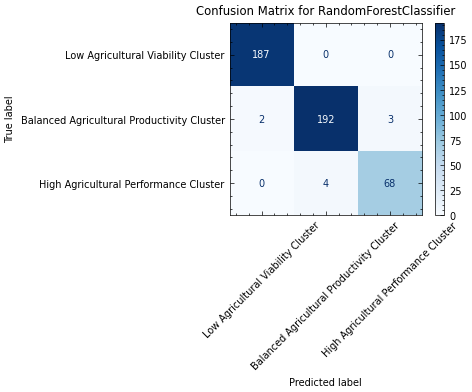

In [31]:
rf = RandomForestClassifier(n_estimators=2,max_depth=5)
train(rf , "RandomForestClassifier" ,X_train ,y_train ,X_test ,y_test)
class_report(rf ,X_test , y_test)
plot_confusion_matrix(rf, X_test, y_test, "RandomForestClassifier")

#### Save Best Model (SVM Classifier with HyperParameter Tuning)

In [32]:
joblib.dump(svc_HyperParameter,'svc_HyperParameter.pkl')
joblib.dump(X_test,'X_test.pkl')
joblib.dump(y_test,'y_test.pkl')

['y_test.pkl']

#### Save Best Model (RandomForestClassifier)

In [33]:
joblib.dump(RandomForestClassifier,'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

## A. The "Cluster Separation" Plot (PCA Scatter Plot)

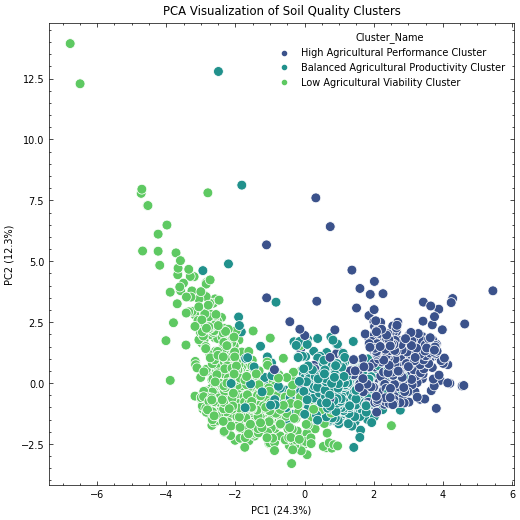

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[clustering_features])

# 2. PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# 3. Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Name', data=df, palette='viridis', s=50)
plt.title('PCA Visualization of Soil Quality Clusters')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.savefig('pca_clusters.pdf', dpi=300) # Save as PDF for paper
plt.show()

## B. The "Cluster Characteristic" Plot (Grouped Boxplots)

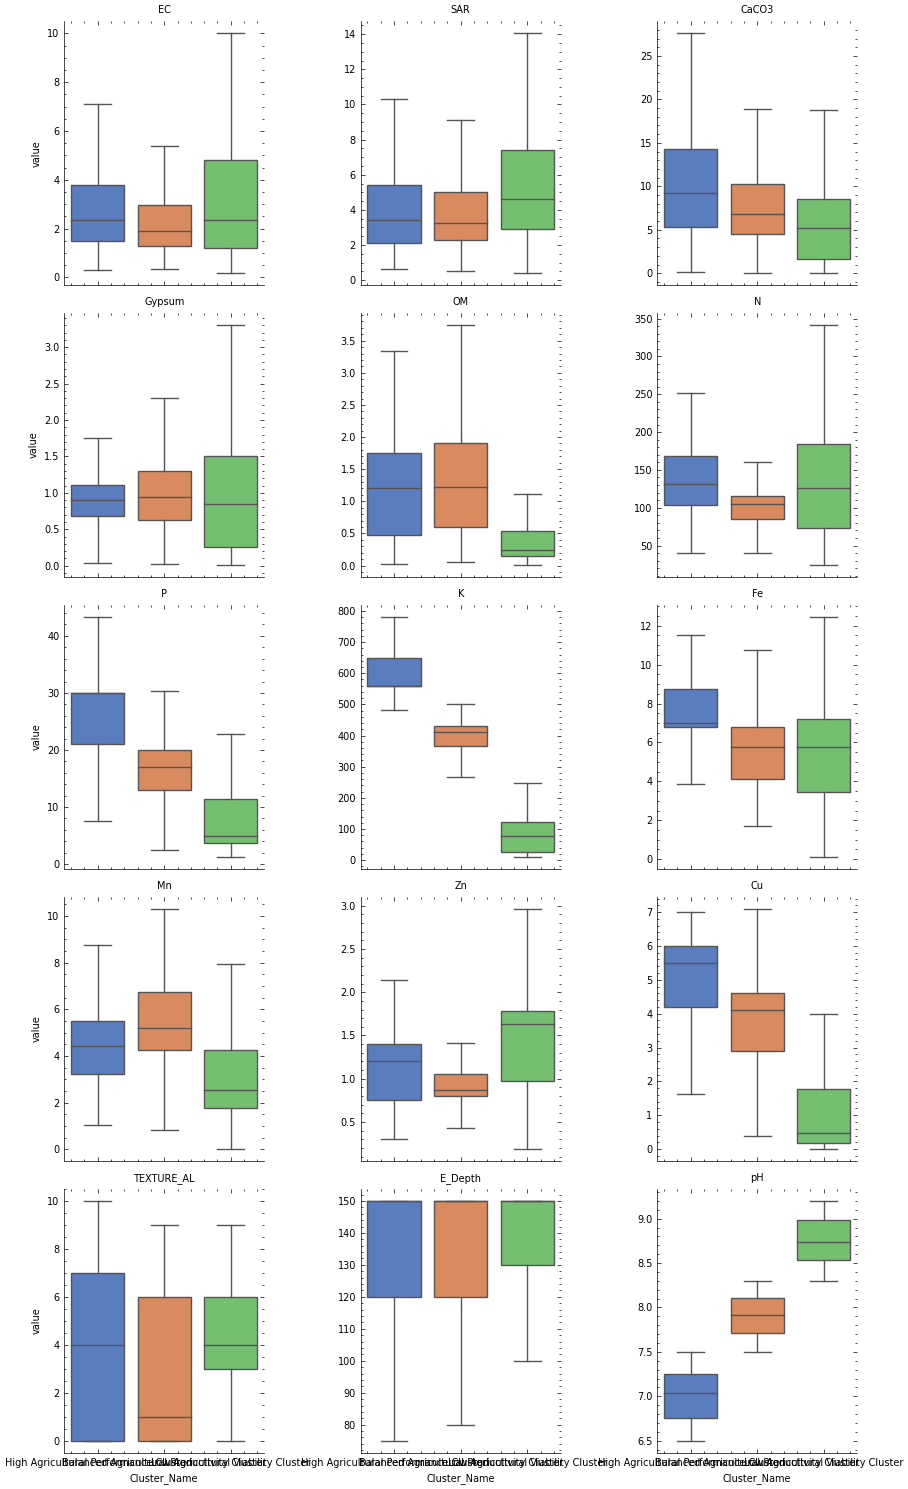

In [35]:
# Melt data for Seaborn
df_melt = df.melt(id_vars='Cluster_Name', value_vars=clustering_features)

# Plot
g = sns.FacetGrid(df_melt, col='variable', col_wrap=3, sharey=False, height=3)
g.map(sns.boxplot, 'Cluster_Name', 'value', palette='muted', showfliers=False)
g.set_titles("{col_name}")
g.savefig('boxplots_features.pdf', dpi=300)
plt.show()

## C. The "Soil Profile" Plot (Radar / Spider Chart)

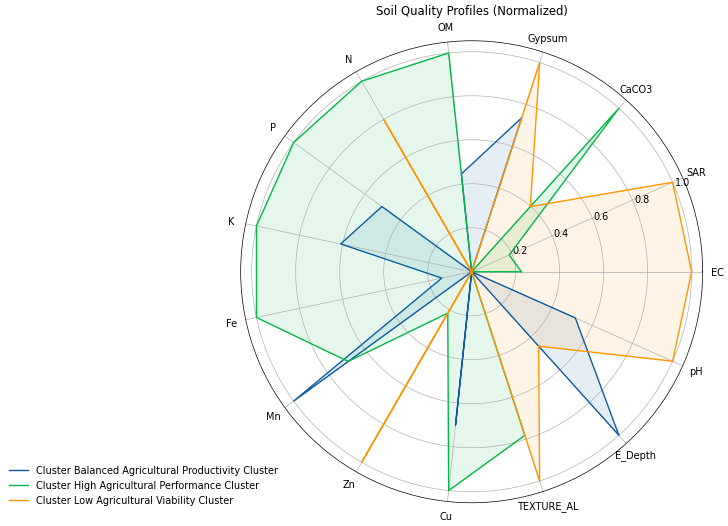

In [36]:
from math import pi

# 1. Group by Cluster and take the Mean
cluster_means = df.groupby('Cluster_Name')[clustering_features].mean()

# 2. Normalize (Min-Max) for the chart
normalized_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# 3. Plotting logic (Standard Matplotlib for Radar)
categories = list(normalized_means.columns)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] # Close the circle

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in normalized_means.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Soil Quality Profiles (Normalized)")
plt.savefig('radar_chart.pdf', dpi=300)
plt.show()

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Thanks</h2>
</div>